In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Welcome to analysis and machine learning - Titanic** <br>
Our focus is to extract some meaningful data and to find the best model that predict the survival from Titanic
1. Import the dataset <br>
2. Overall data <br>
3. Data Cleaning <br>
4. Data Analysis <br>
5. Data Preprocessing <br>
6. Machine Learning <br>
7. Summary

# **1) Import the dataset (train, test, and gender information)**

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# **2) Overall information**

In [3]:
train_data.info()
test_data.info()
gender_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [4]:
print("Train_data_missing:", train_data.isna().sum().sum())
print("Shape: ", train_data.shape)

Train_data_missing: 866
Shape:  (891, 12)


In [5]:
print("Test_data_missing:", test_data.isna().sum().sum())
print("Shape: ", test_data.shape)

Test_data_missing: 414
Shape:  (418, 11)


In [6]:
print("Gender_data_missing: ", gender_data.isna().sum().sum())
print("Shape: ", gender_data.shape)

Gender_data_missing:  0
Shape:  (418, 2)


# Check details of each data

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test_data.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
gender_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [14]:
gender_data.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


# 3) Clearing Data

**Focusing on:**
1. Droping unimportant columns: <br>
    *     Cabin: contain more than 50% of missing value <br>
    *     Ticket: has the 681 uniqueness and one ticket contains numberic and text together, difficult to group. <br>
    *     Name: the uniqueness is 100%, this may be nothing relate to the survival <br>
2. Applying mean (average) to the missing value <br>
3. Applying most frequent value to the missing category <br>

# Training data

In [15]:
# Start with training dataset first
train_missing = (train_data.isnull().sum()/train_data.shape[0])*100
train_missing = train_missing.sort_values(ascending=False)

<AxesSubplot:>

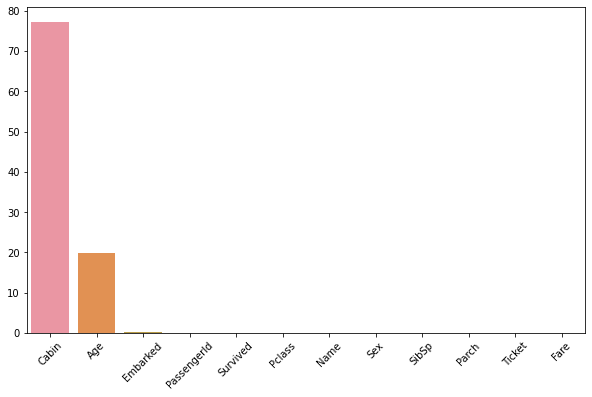

In [16]:
#show the missing values in a plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xticks(rotation="45")
sns.barplot(x=train_missing.index, y=train_missing)

In [17]:
# Drop missing that more than 50% and Ticket and Name which contain much unique in the dataset
new_train_data = train_data.drop(columns='Cabin', axis=1)
new_train_data = new_train_data.drop(columns='Ticket', axis=1)
new_train_data = new_train_data.drop(columns='Name', axis=1)
new_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [18]:
new_train_data['Age'].mean()

29.69911764705882

In [19]:
# Applying an average to the missing data for Age
new_train_data['Age'] = new_train_data['Age'].fillna(new_train_data['Age'].mean())

new_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [20]:
# Fill NA with most frequent for category
new_train_data['Embarked'] = new_train_data['Embarked'].fillna(new_train_data['Embarked'].value_counts().index[0])

In [21]:
# Removing the row that missing (for Embark)

#bad_row = []
#for i in range(new_train_data.shape[0]):
#    row_missing = new_train_data.iloc[i].isnull().sum()
#    if row_missing > 0:
#        bad_row.append(i)
        
#bad_row

#new_train_data = new_train_data.drop(bad_row, axis=0)

In [22]:
new_train_data.isnull().sum().sum()

0

# Test Data

In [23]:
# Test data
test_missing = (test_data.isna().sum()/test_data.shape[0]) *100
test_missing = test_missing.sort_values(ascending=False)

<AxesSubplot:>

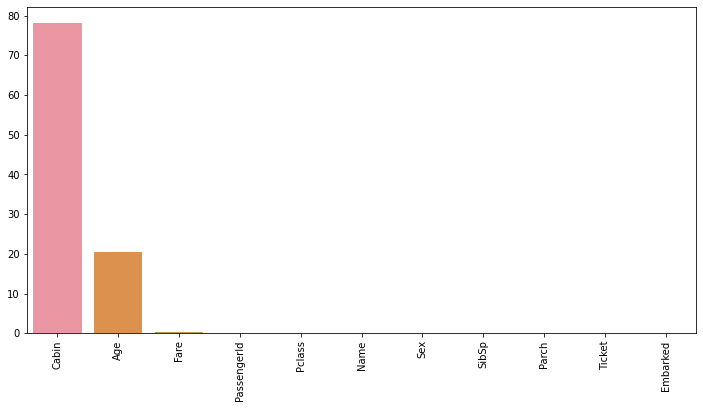

In [24]:
#show the missing values in a plot
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=test_missing.index, y=test_missing)

In [25]:
test_missing[test_missing > 50].index

Index(['Cabin'], dtype='object')

In [26]:
# Drop missing that more than 50% and Ticket and Name which contain much unique in the dataset
new_test_data = test_data.drop(columns='Cabin', axis=0)
new_test_data = new_test_data.drop(columns='Ticket', axis=0)
new_test_data = new_test_data.drop(columns='Name', axis=0)
new_test_data.isnull().sum().sum()

87

In [27]:
# Fill NA with the average of age for numeric
new_test_data['Age'] = new_test_data['Age'].fillna(int(new_test_data['Age'].mean()))
new_test_data['Fare'] = new_test_data['Fare'].fillna(new_test_data['Fare'].mean())

# Fill NA with most frequent for category
new_test_data['Embarked'] = new_test_data['Embarked'].fillna(new_test_data['Embarked'].value_counts().index[0])

new_test_data.isnull().sum().sum()

0

In [28]:
# Gender
gender_data.isna().sum()

PassengerId    0
Survived       0
dtype: int64

# **3) Data Analytsis**

# Before performing some machine learning. We will go through data analytics to understand data more and get insight the data.
Train columns dataset:
1) Passenger ID <br>
2) Survive or not (Survival rate is 38%/ dead 62%) <br>
3) PClass (First class has the highest chance to survive with 62%) <br>
4) Gender (M:577/ W:314)  <br>
5) Age (max:80/ min:0) <br>
6) SibSp (Number of Siblings) <br>
7) Parch (Number of parents/ children) <br>
8) Fare <br>
9) Embarked <br>

In [29]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [30]:
new_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
perc = []
perc.append(np.count_nonzero(new_train_data['Survived']==0) / new_train_data.shape[0])
perc.append(np.count_nonzero(new_train_data['Survived']==1) / new_train_data.shape[0])
perc

#new_train_data['Survived'][new_train_data['Survived'] == 0].count()

perc_survical = pd.DataFrame(perc)
perc_survical.columns = ['Percentages']
perc_survical

,Percentages
0,0.616162
1,0.383838


In [32]:
new_train_data[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [33]:
new_train_data[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)
#74% of women survived, using this method works because sum(only 1: 233)/count (314)
#18% of men survived

,Survived
Sex,
female,0.742038
male,0.188908


In [34]:
new_train_data[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [35]:
new_train_data[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [36]:
new_train_data[['Parch','Survived']].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


# Observation by visualization

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

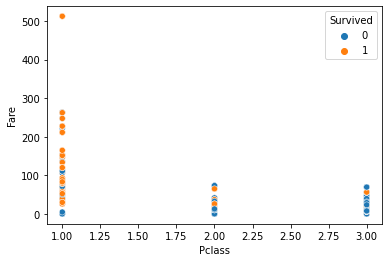

In [37]:
import seaborn as sns
sns.scatterplot(data=new_train_data, x="Pclass", y="Fare", hue="Survived")

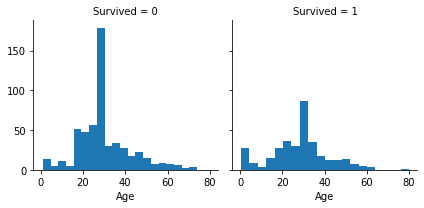

In [38]:
g = sns.FacetGrid(new_train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)

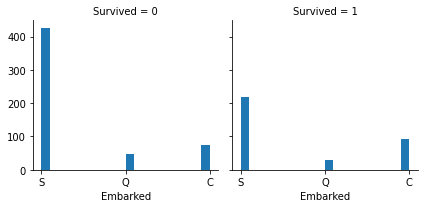

In [39]:
g = sns.FacetGrid(new_train_data, col='Survived')
g.map(plt.hist, 'Embarked', bins=20)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


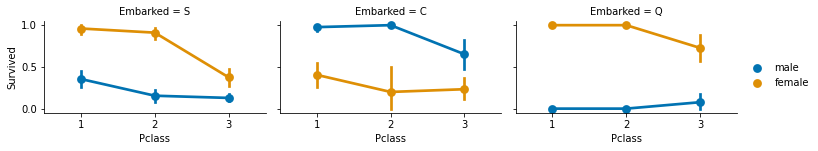

In [40]:
grid = sns.FacetGrid(new_train_data, col='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette='colorblind')
grid.add_legend()

<AxesSubplot:xlabel='Fare', ylabel='Age'>

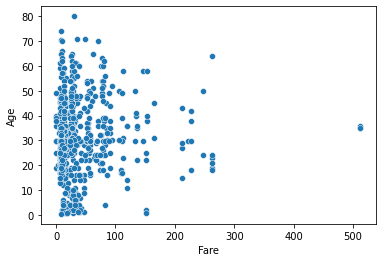

In [41]:
sns.scatterplot(data=new_train_data, x='Fare', y='Age')

In [42]:
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


# **4) Data Preprocessing**

For data preprocessing we have to dummy the category into number.

**Train dataset**

In [43]:
new_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [44]:
# Get the category to the list
categorical_column=[]
for i in new_train_data:
    if new_train_data[i].dtype == np.dtype('O'):
        categorical_column.append(i)
categorical_column

['Sex', 'Embarked']

In [45]:
new_train_data.shape

(891, 9)

In [46]:
new_train_clean = pd.get_dummies(new_train_data, columns=categorical_column)
new_train_clean.shape

(891, 12)

**Test dataset**

In [47]:
# Collect the category type to the list and we will dummy the catogorical 
cat_column = []
for i in new_test_data:
    if new_test_data[i].dtype == np.dtype('O'):
        cat_column.append(i)
cat_column

['Sex', 'Embarked']

In [48]:
new_test_data.shape

(418, 8)

In [49]:
new_test_clean = pd.get_dummies(new_test_data, columns=cat_column)
new_test_clean.shape

(418, 11)

# **5) Machine Learning**

In [50]:
X_train = new_train_clean.drop(['Survived','PassengerId'], axis=1)
Y_train = new_train_clean['Survived']
X_test = new_test_clean.drop('PassengerId', axis=1)
Y_test = gender_data['Survived']

In [51]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (891, 10)
Y_train: (891,)
X_test: (418, 10)
Y_test: (418,)


**Models:**
1) KNeighbors Classifier <br>
2) Logistic Regression <br>
3) DecisionTree Classifier <br>
4) RandomForest Classifier <br>

In [52]:
#1) KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3)

# Train the classifier using the training data (fit the model to the data)
knn.fit(X_train, Y_train)

# Evaluate Performance of the KNN Classifier on the Training Set and the Testing Set
# we can do it another way, accuracy training
Y_train_pred = knn.predict(X_train)
acc_score_knn_train = accuracy_score(Y_train, Y_train_pred)
print("Accuracy KNN Training:", acc_score_knn_train)

# accuracy testing
Y_test_pred = knn.predict(X_test)
acc_score_knn_test = accuracy_score(Y_test, Y_test_pred)
print("Accuracy KNN Testing:", acc_score_knn_test)

Accuracy KNN Training: 0.835016835016835
Accuracy KNN Testing: 0.6794258373205742


In [53]:
# 2) Logistic Regression
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()

#Train the model on the training set: x_train, y_train
LGR.fit(X_train, Y_train)
acc_score_lgr_train = LGR.score(X_train, Y_train)
print('Accuracy Logistic Training:', acc_score_lgr_train)

#Test the model on the testing set: x_test, y_test (applying another )
y_test_pred=LGR.predict(X_test)
acc_score_lgr_test = np.sum(y_test_pred == Y_test)/Y_test.shape[0]
print('Accuracy Logistic Testing:', acc_score_lgr_test)

Accuracy Logistic Training: 0.8002244668911336
Accuracy Logistic Testing: 0.9425837320574163


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
#3) DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
# instance of the classifier
model_dct = DecisionTreeClassifier(max_depth=1) #will be +1 = 2 clases (survived or not)
 
#Train the model on the training set: x_train, y_train
model_dct.fit(X_train, Y_train)
acc_score_dct_train = model_dct.score(X_train, Y_train)
print("Accuracy DecisionTree Train:", acc_score_dct_train)

#Test the model on the testing set: x_test, y_test
acc_score_dct_test = model_dct.score(X_test, Y_test)
print('Accuracy DecisionTree Test:', acc_score_dct_test)

Accuracy DecisionTree Train: 0.7867564534231201
Accuracy DecisionTree Test: 1.0


In [55]:
#4) RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=1)
RF.fit(X_train, Y_train)

acc_score_RF_train = RF.score(X_train, Y_train)
print("Accuracy Forest Training:", acc_score_RF_train)

acc_score_RF_test = RF.score(X_test, Y_test)
print("Accuracy Forest Testing:", acc_score_RF_test)

Accuracy Forest Training: 0.7867564534231201
Accuracy Forest Testing: 1.0


In [56]:
#5) GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

GC = GradientBoostingClassifier()
GC.fit(X_train, Y_train)

acc_score_GC_train = GC.score(X_train, Y_train)
print("Accuracy GB Training:", acc_score_GC_train)

acc_score_GC_test = GC.score(X_test, Y_test)
print("Accuracy GB Testing:", acc_score_GC_test)

Accuracy GB Training: 0.8922558922558923
Accuracy GB Testing: 0.8923444976076556


# 6) Model evaluation
To rank the model, we summarize the accuracy score of each model to evaluate the best model to predict our result on titanic data.

In [57]:
accuracy_result = [['Training Accuracy', acc_score_knn_train, acc_score_lgr_train, acc_score_dct_train, acc_score_RF_train, acc_score_GC_train],
                     ['Testing Accuracy', acc_score_knn_test, acc_score_lgr_test, acc_score_dct_test, acc_score_RF_test, acc_score_GC_test]]

report_accuracy = pd.DataFrame (accuracy_result, columns = ['Accuracy_score','KNN Classifier', 
                                          'Logistic Regression', 
                                          'DecisionTree Classifier', 
                                          'RandomForest Classifier',
                                          'GradientBoosting Classifier'])

report_accuracy

,Accuracy_score,KNN Classifier,Logistic Regression,DecisionTree Classifier,RandomForest Classifier,GradientBoosting Classifier
0,Training Accuracy,0.835017,0.800224,0.786756,0.786756,0.892256
1,Testing Accuracy,0.679426,0.942584,1.000000,1.000000,0.892344


In [58]:
# Even though, DecisionTree and RandomForest get the high score for testing. 
# While to prevent overfitting GradientBoosting performs better.

In [59]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train, Y_train)
prediction = best_model.predict(X_test)

In [60]:
submission = pd.DataFrame({
        "PassengerId": new_test_data["PassengerId"],
        "Survived": prediction})
submission.to_csv("submission.csv",index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


#For the advance, we would like to split data into validation as well. While in this submission, we will perform only train and test to evaluate the data.